# Computational Drug Discovery Project

Pouyan Chamanian

We will use bioactivity data for Epidermal Growth Factor Receptor (EGFR) from the chEMBL database



In [4]:
! pip install panda
! pip install chembl_webresource_client

  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7256 sha256=3c990933491015e9566559792f8223168c0b301f718b655a47c81b79a88074de
  Stored in directory: /home/pouyannc/.cache/pip/wheels/6c/5a/a9/a28c87238ddcc61701224f538bedccc21c9e2b8bc6fa8fca0e
Successfully built panda
     |████████████████████████████████| 55 kB 2.3 MB/s eta 0:00:011
  Created wheel for easydict: filename=easydict-1.9-py3-none-any.whl size=6360 sha256=384a3c3cd770b3a12a9f9733bb7106674dee618e7e0dedf99b58313c7cdd9d77
  Stored in directory: /home/pouyannc/.cache/pip/wheels/b2/1c/36/fd8efc3fa029b1445d869f359ec13e8fbce7fc9e81505bca66
Successfully built easydict


Importing Libraries

In [10]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

Target Search


In [11]:
#Searching for EGFR in all targets
target_query = new_client.target.search("EGFR")
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q01279', 'xref_name': None, 'xre...",Mus musculus,Epidermal growth factor receptor erbB1,16.00,False,CHEMBL3608,"[{'accession': 'Q01279', 'component_descriptio...",SINGLE PROTEIN,10090
1,[],Homo sapiens,EGFR/PPP1CA,16.00,False,CHEMBL4523747,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
2,[],Homo sapiens,VHL/EGFR,16.00,False,CHEMBL4523998,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
3,"[{'xref_id': 'P00533', 'xref_name': None, 'xre...",Homo sapiens,Epidermal growth factor receptor erbB1,12.00,False,CHEMBL203,"[{'accession': 'P00533', 'component_descriptio...",SINGLE PROTEIN,9606
4,[],Homo sapiens,Protein cereblon/Epidermal growth factor receptor,11.00,False,CHEMBL4523680,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
5,[],Homo sapiens,MER intracellular domain/EGFR extracellular do...,9.00,False,CHEMBL3137284,"[{'accession': 'P00533', 'component_descriptio...",CHIMERIC PROTEIN,9606
6,[],Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,7.00,False,CHEMBL2111431,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606
7,[],Homo sapiens,Baculoviral IAP repeat-containing protein 2/Ep...,7.00,False,CHEMBL4802031,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
8,[],Homo sapiens,Epidermal growth factor receptor,5.00,False,CHEMBL2363049,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606


In [6]:
#choosing the EGFR erbB1 single protein as our target
target_id = targets.target_chembl_id[3]
target_id

'CHEMBL203'

In [28]:
#filter for IC50 values
res = new_client.activity.filter(target_chembl_id=target_id)

In [32]:
df = pd.DataFrame.from_dict(res)

In [40]:
pd.set_option('display.max_columns', None)
df.head(4)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,None,None,CHEMBL1134862,Bioorg. Med. Chem. Lett.,2002.0,"{'bei': '19.25', 'le': '0.37', 'lle': '2.94', ...",CHEMBL68920,None,CHEMBL68920,7.39,False,http://www.openphacts.org/units/Nanomolar,119482,=,1,True,=,None,IC50,nM,None,41.0,CHEMBL203,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
1,None,32263,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,None,None,CHEMBL1134862,Bioorg. Med. Chem. Lett.,2002.0,None,CHEMBL68920,None,CHEMBL68920,6.52,False,http://www.openphacts.org/units/Nanomolar,119482,=,1,True,=,None,IC50,nM,None,300.0,CHEMBL203,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.3
2,None,32265,[],CHEMBL615325,Inhibition of ligand-induced proliferation in ...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,None,None,CHEMBL1134862,Bioorg. Med. Chem. Lett.,2002.0,None,CHEMBL68920,None,CHEMBL68920,5.11,False,http://www.openphacts.org/units/Nanomolar,119482,=,1,True,=,None,IC50,nM,None,7820.0,CHEMBL203,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,7.82
3,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,None,None,CHEMBL1134862,Bioorg. Med. Chem. Lett.,2002.0,"{'bei': '14.02', 'le': '0.27', 'lle': '3.16', ...",CHEMBL69960,None,CHEMBL69960,6.77,False,http://www.openphacts.org/units/Nanomolar,119494,=,1,True,=,None,IC50,nM,None,170.0,CHEMBL203,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17


In [41]:
res = new_client.activity.filter(target_chembl_id=target_id).filter(standard_type="IC50")
df=pd.DataFrame.from_dict(res)
df.head(4)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,None,None,CHEMBL1134862,Bioorg. Med. Chem. Lett.,2002.0,"{'bei': '19.25', 'le': '0.37', 'lle': '2.94', ...",CHEMBL68920,None,CHEMBL68920,7.39,False,http://www.openphacts.org/units/Nanomolar,119482,=,1,True,=,None,IC50,nM,None,41.0,CHEMBL203,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
1,None,32263,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,None,None,CHEMBL1134862,Bioorg. Med. Chem. Lett.,2002.0,None,CHEMBL68920,None,CHEMBL68920,6.52,False,http://www.openphacts.org/units/Nanomolar,119482,=,1,True,=,None,IC50,nM,None,300.0,CHEMBL203,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.3
2,None,32265,[],CHEMBL615325,Inhibition of ligand-induced proliferation in ...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,None,None,CHEMBL1134862,Bioorg. Med. Chem. Lett.,2002.0,None,CHEMBL68920,None,CHEMBL68920,5.11,False,http://www.openphacts.org/units/Nanomolar,119482,=,1,True,=,None,IC50,nM,None,7820.0,CHEMBL203,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,7.82
3,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,None,None,CHEMBL1134862,Bioorg. Med. Chem. Lett.,2002.0,"{'bei': '14.02', 'le': '0.27', 'lle': '3.16', ...",CHEMBL69960,None,CHEMBL69960,6.77,False,http://www.openphacts.org/units/Nanomolar,119494,=,1,True,=,None,IC50,nM,None,170.0,CHEMBL203,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17


In [42]:
df.standard_type.unique()

array(['IC50'], dtype=object)

In [43]:
df.to_csv("EGFR_bioactivity.csv", index=False)

In [49]:
! copy EGFR_bioactivity.csv cd

        1 file(s) copied.


In [80]:
#removing missing data
df2 = df[df.standard_value.notna()]


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,None,None,CHEMBL1134862,Bioorg. Med. Chem. Lett.,2002.0,"{'bei': '19.25', 'le': '0.37', 'lle': '2.94', ...",CHEMBL68920,None,CHEMBL68920,7.39,False,http://www.openphacts.org/units/Nanomolar,119482,=,1,True,=,None,IC50,nM,None,41.0,CHEMBL203,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
1,None,32263,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,None,None,CHEMBL1134862,Bioorg. Med. Chem. Lett.,2002.0,None,CHEMBL68920,None,CHEMBL68920,6.52,False,http://www.openphacts.org/units/Nanomolar,119482,=,1,True,=,None,IC50,nM,None,300.0,CHEMBL203,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.3
2,None,32265,[],CHEMBL615325,Inhibition of ligand-induced proliferation in ...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,None,None,CHEMBL1134862,Bioorg. Med. Chem. Lett.,2002.0,None,CHEMBL68920,None,CHEMBL68920,5.11,False,http://www.openphacts.org/units/Nanomolar,119482,=,1,True,=,None,IC50,nM,None,7820.0,CHEMBL203,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,7.82
3,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,None,None,CHEMBL1134862,Bioorg. Med. Chem. Lett.,2002.0,"{'bei': '14.02', 'le': '0.27', 'lle': '3.16', ...",CHEMBL69960,None,CHEMBL69960,6.77,False,http://www.openphacts.org/units/Nanomolar,119494,=,1,True,=,None,IC50,nM,None,170.0,CHEMBL203,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17
4,None,32270,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,None,None,CHEMBL1134862,Bioorg. Med. Chem. Lett.,2002.0,None,CHEMBL69960,None,CHEMBL69960,7.40,False,http://www.openphacts.org/units/Nanomolar,119494,=,1,True,=,None,IC50,nM,None,40.0,CHEMBL203,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15258,Not Active,23070040,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4509084,EGFR kinase inhibition assay,B,None,None,BAO_0000179,BAO_0000357,single protein format,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,Non standard unit for type,Units for this activity type are unusual and m...,CHEMBL4507273,None,2021.0,None,CHEMBL4520788,BAY-294,CHEMBL4520788,None,False,None,3359676,>,54,False,>,None,IC50,µM,None,20.0,CHEMBL203,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,µM,None,None,20.0
15259,None,23090818,[],CHEMBL4510669,"Protein Tyrosine Kinase, EGF Receptor Eurofins...",B,None,None,BAO_0000179,BAO_0000357,single p

In [83]:
#drop duplicate molecules for simplicity
df2 = df2.drop_duplicates(subset="molecule_chembl_id")
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,None,None,CHEMBL1134862,Bioorg. Med. Chem. Lett.,2002.0,"{'bei': '19.25', 'le': '0.37', 'lle': '2.94', ...",CHEMBL68920,None,CHEMBL68920,7.39,False,http://www.openphacts.org/units/Nanomolar,119482,=,1,True,=,None,IC50,nM,None,41.0,CHEMBL203,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
3,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,None,None,CHEMBL1134862,Bioorg. Med. Chem. Lett.,2002.0,"{'bei': '14.02', 'le': '0.27', 'lle': '3.16', ...",CHEMBL69960,None,CHEMBL69960,6.77,False,http://www.openphacts.org/units/Nanomolar,119494,=,1,True,=,None,IC50,nM,None,170.0,CHEMBL203,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17
6,None,32680,[],CHEMBL677833,In vitro inhibition of Epidermal growth factor...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,None,None,CHEMBL1145114,J. Med. Chem.,2003.0,"{'bei': '13.62', 'le': '0.25', 'lle': '0.26', ...",CHEMBL137635,None,CHEMBL137635,5.03,False,http://www.openphacts.org/units/Nanomolar,262238,=,1,True,=,None,IC50,nM,None,9300.0,CHEMBL203,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,9.3
7,None,32770,[],CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,Outside typical range,Values for this activity type are unusually la...,CHEMBL1124610,J. Med. Chem.,1989.0,None,CHEMBL306988,None,CHEMBL306988,None,False,http://www.openphacts.org/units/Nanomolar,137177,=,1,True,=,None,IC50,nM,None,500000.0,CHEMBL203,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,500.0
8,None,32772,[],CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)/C=C/c1ccc(O)cc1,Outside typical range,Values for this activity type are unusually la...,CHEMBL1124610,J. Med. Chem.,1989.0,None,CHEMBL66879,COUMARIC ACID,CHEMBL66879,None,False,http://www.openphacts.org/units/Nanomolar,137215,=,1,True,=,None,IC50,nM,None,3000000.0,CHEMBL203,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15258,Not Active,23070040,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4509084,EGFR kinase inhibition assay,B,None,None,BAO_0000179,BAO_0000357,single protein format,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,Non standard unit for type,Units for this activity type are unusual and m...,CHEMBL4507273,None,2021.0,None,CHEMBL4520788,BAY-294,CHEMBL4520788,None,False,None,3359676,>,54,False,>,None,IC50,µM,None,20.0,CHEMBL203,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,µM,None,None,20.0
152

In [84]:
#set bioactivity level based on standard value

bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [96]:
#construct new dataframe with molecule_chembl_id, canonical_smiles, and standard_value

selection = ["molecule_chembl_id", "canonical_smiles", "standard_value"]
df3 = df2[selection]
df3 = df3.reset_index()
df3

,index,molecule_chembl_id,canonical_smiles,standard_value
0,0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0
1,3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0
2,6,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.0
3,7,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.0
4,8,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.0
...,...,...,...,...
8917,15258,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,20.0
8918,15259,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,4.59
8919,15260,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.0
8920,15261,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.0


In [97]:
#add bioactivity_class to df3
df3 = pd.concat([df3,pd.Series(bioactivity_class).rename("bioactivity_class")], axis=1)
df3

,index,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0,active
1,3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0,active
2,6,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.0,intermediate
3,7,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.0,inactive
4,8,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.0,inactive
...,...,...,...,...,...
8917,15258,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,20.0,active
8918,15259,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,4.59,active
8919,15260,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.0,active
8920,15261,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.0,active


In [98]:
df3.to_csv("EGFR_bioactivity_preprocessed.csv", index=False)

In [101]:
! copy EGFR_bioactivity_preprocessed.csv cd

        1 file(s) copied.


In [6]:
conda install -c conda-forge rdkit

Solving environment: done

## Package Plan ##

  environment location: /home/pouyannc/miniconda3

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-4.5          |           1_llvm           5 KB  conda-forge
    alsa-lib-1.2.3             |       h516909a_0         560 KB  conda-forge
    boost-1.74.0               |   py39h5472131_5         357 KB  conda-forge
    boost-cpp-1.74.0           |       h312852a_4        16.3 MB  conda-forge
    cairo-1.16.0               |    h6cf1ce9_1008         1.5 MB  conda-forge
    glib-2.70.2                |       h780b84a_4         430 KB  conda-forge
    glib-tools-2.70.2          |       h780b84a_4         106 KB  conda-forge
    gst-plugins-base-1.18.5    |       hf529b03_2         2.6 MB  conda-forge
    gstreamer-1.18.5           |       h9f60fe5_3         2.0 MB  conda-forge
    icu-68.2     

In [12]:
import numpy as np

In [13]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [14]:
df = pd.read_csv("EGFR_bioactivity_preprocessed.csv")

In [15]:
df2 = df[df.canonical_smiles.notna()]
df2.reset_index(drop=True, inplace=True)
df2

,index,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.00,active
1,3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.00,active
2,6,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.00,intermediate
3,7,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.00,inactive
4,8,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.00,inactive
...,...,...,...,...,...
8910,15258,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,20.00,active
8911,15259,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,4.59,active
8912,15260,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.00,active
8913,15261,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.00,active


In [16]:
#function to calculate molecular descriptors (custom function from github.com/dataprofessor)

def lipinski(smiles, verbose=False):
    
    moldata=[]
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) #constructing molecule from smile
        moldata.append(mol)
        
    baseData = np.arange(1,1)
    i=0
    for mol in moldata:
        
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [17]:
df_lipinski = lipinski(df2.canonical_smiles)

In [18]:
df_lipinski


,MW,LogP,NumHDonors,NumHAcceptors
0,383.81,4.45,3.00,4.00
1,482.90,3.61,3.00,6.00
2,369.43,4.77,1.00,6.00
3,283.29,2.31,2.00,4.00
4,164.16,1.49,2.00,2.00
...,...,...,...,...
8910,448.59,5.58,2.00,7.00
8911,475.51,7.36,2.00,2.00
8912,402.45,2.35,0.00,5.00
8913,481.35,3.12,0.00,5.00


In [19]:
df_combined = pd.concat([df2,df_lipinski], axis=1)
df_combined

,index,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.00,active,383.81,4.45,3.00,4.00
1,3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.00,active,482.90,3.61,3.00,6.00
2,6,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.00,intermediate,369.43,4.77,1.00,6.00
3,7,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.00,inactive,283.29,2.31,2.00,4.00
4,8,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.00,inactive,164.16,1.49,2.00,2.00
...,...,...,...,...,...,...,...,...,...
8910,15258,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,20.00,active,448.59,5.58,2.00,7.00
8911,15259,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,4.59,active,475.51,7.36,2.00,2.00
8912,15260,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.00,active,402.45,2.35,0.00,5.00
8913,15261,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.00,active,481.35,3.12,0.00,5.00


In [20]:
#convert IC50 values to pIC50

def pIC50(input): #takes df as input and replaces standard_value column with pIC50
    
    pIC50 = []
    
    for i in input["standard_value"]:
        molar = i*(10**-9)
        pIC50.append(-np.log10(molar))
        
    input["pIC50"] = pIC50
    transformed_df = input.drop("standard_value", 1)
    
    return transformed_df
    

In [21]:
df_combined.standard_value.describe()

#max value is less than 10^9 so we will not have to worry about negative pIC50 values

count       8915.00
mean       30828.16
std       683017.60
min            0.00
25%           33.00
50%          366.00
75%         6881.50
max     55000000.00
Name: standard_value, dtype: float64

In [22]:
df_final = pIC50(df_combined)
df_final

,index,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.81,4.45,3.00,4.00,7.39
1,3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.90,3.61,3.00,6.00,6.77
2,6,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,intermediate,369.43,4.77,1.00,6.00,5.03
3,7,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,inactive,283.29,2.31,2.00,4.00,3.30
4,8,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,inactive,164.16,1.49,2.00,2.00,2.52
...,...,...,...,...,...,...,...,...,...
8910,15258,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,active,448.59,5.58,2.00,7.00,7.70
8911,15259,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,active,475.51,7.36,2.00,2.00,8.34
8912,15260,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.45,2.35,0.00,5.00,6.00
8913,15261,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.35,3.12,0.00,5.00,6.00


In [23]:
df_final.pIC50.describe()

count   8915.00
mean       6.43
std        1.48
min        1.26
25%        5.16
50%        6.44
75%        7.48
max       11.52
Name: pIC50, dtype: float64

In [24]:
#comparing between active and inactive class

df_2class = df_final[df_final.bioactivity_class != "intermediate"]
df_2class.reset_index(drop=True, inplace=True)
df_2class

,index,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.81,4.45,3.00,4.00,7.39
1,3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.90,3.61,3.00,6.00,6.77
2,7,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,inactive,283.29,2.31,2.00,4.00,3.30
3,8,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,inactive,164.16,1.49,2.00,2.00,2.52
4,9,CHEMBL77085,N#CC(C#N)=Cc1cc(O)ccc1[N+](=O)[O-],inactive,215.17,1.73,1.00,5.00,4.02
...,...,...,...,...,...,...,...,...,...
7539,15258,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,active,448.59,5.58,2.00,7.00,7.70
7540,15259,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,active,475.51,7.36,2.00,2.00,8.34
7541,15260,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.45,2.35,0.00,5.00,6.00
7542,15261,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.35,3.12,0.00,5.00,6.00


## Exploratory Data Analysis (Chemical Space analysis) using Lipinski descriptors

In [57]:
import seaborn as sns
sns.set(style="ticks")
import matplotlib.pyplot as plt

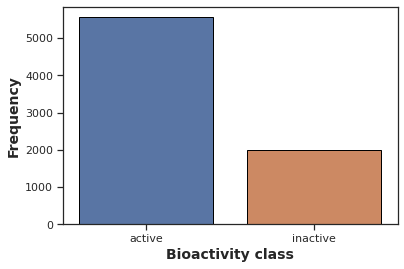

In [58]:
sns.countplot(x="bioactivity_class", data=df_2class, edgecolor="black")

plt.xlabel("Bioactivity class", fontsize=14, fontweight="bold")
plt.ylabel("Frequency", fontsize=14, fontweight="bold")

plt.savefig("plot_bioactivity_class.pdf")

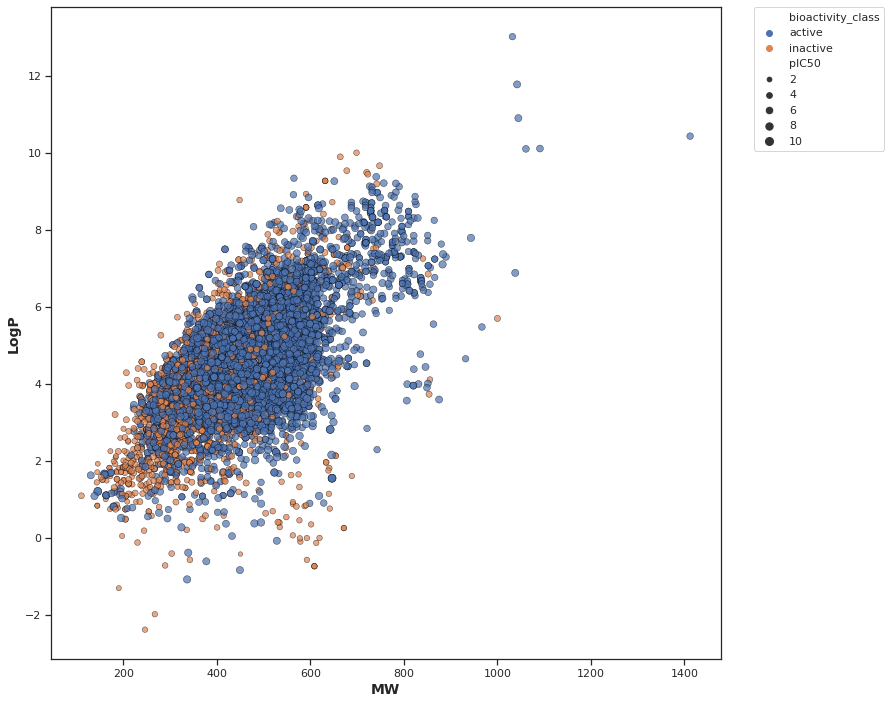

In [61]:
#scatter plot of MW vs LogP

plt.figure(figsize=(12,12))

sns.scatterplot(x="MW" , y="LogP", data=df_2class, hue="bioactivity_class", size="pIC50", edgecolor="black", alpha=0.7)

plt.xlabel("MW", fontsize=14, fontweight="bold")
plt.ylabel("LogP", fontsize=14, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

plt.savefig("plot_MW_vs_LogP.pdf")

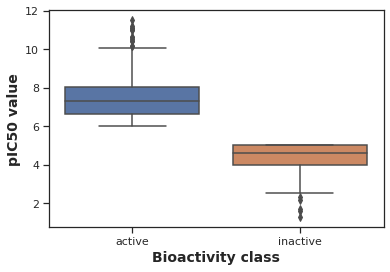

In [62]:
#boxplot for pIC50

sns.boxplot(x="bioactivity_class", y='pIC50', data=df_2class)

plt.xlabel("Bioactivity class", fontsize=14, fontweight="bold")
plt.ylabel("pIC50 value", fontsize=14, fontweight="bold")

plt.savefig('plot_ic50.pdf')


In [63]:
#test statistical significance using Mann_Whitney U test

def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results


In [66]:
#comparing active and inactive classes to check for significance for pIC50
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,11038188.0,0.0,0.05,Different distribution (reject H0)


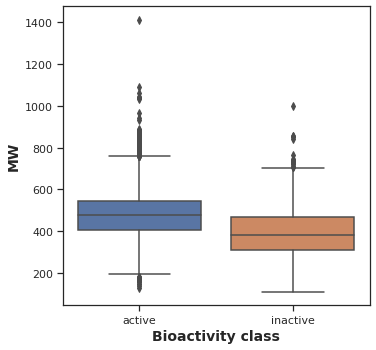

In [67]:
#MW
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [68]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,7876058.0,4.324440e-176,0.05,Different distribution (reject H0)


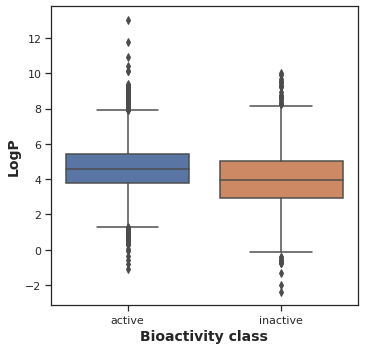

In [69]:
#LogP
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [70]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,6925138.0,6.575676e-64,0.05,Different distribution (reject H0)


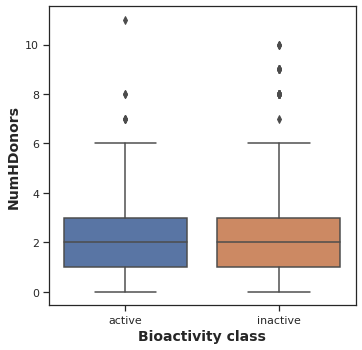

In [71]:
#NumHDonors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [75]:
mannwhitney('NumHDonors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,6055150.0,1.157529e-11,0.05,Different distribution (reject H0)


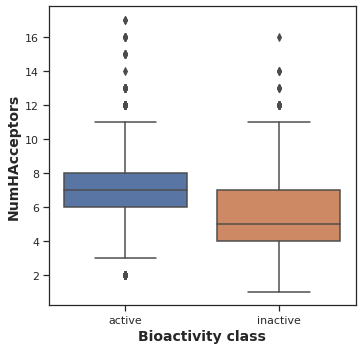

In [73]:
#NumHAcceptors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [74]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,7682745.0,8.479409e-152,0.05,Different distribution (reject H0)


The pIC50 values show statistically significant difference between the active and inactive class, which is expected.

All four Lipinski descriptor show statistically significant difference between the active and inactive class.

In [81]:
! export PATH=$PATH:"C:\Program Files\7-Zip"
! 7z -r results.zip . -i *.csv *.pdf

#running this in terminal instead

/bin/bash: 7z: command not found


## Descriptor Calculation and Dataset Preparation

In [25]:
#using PaDEL to calculate molecular descriptors

import pandas as pd
df_final

,index,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.81,4.45,3.00,4.00,7.39
1,3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.90,3.61,3.00,6.00,6.77
2,6,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,intermediate,369.43,4.77,1.00,6.00,5.03
3,7,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,inactive,283.29,2.31,2.00,4.00,3.30
4,8,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,inactive,164.16,1.49,2.00,2.00,2.52
...,...,...,...,...,...,...,...,...,...
8910,15258,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,active,448.59,5.58,2.00,7.00,7.70
8911,15259,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,active,475.51,7.36,2.00,2.00,8.34
8912,15260,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.45,2.35,0.00,5.00,6.00
8913,15261,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.35,3.12,0.00,5.00,6.00


In [26]:
selection = ['canonical_smiles', 'molecule_chembl_id']
df_selection=df_final[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [27]:
! cat molecule.smi | head -5


Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)c32)[nH]1	CHEMBL68920
Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(Nc3ccc(F)c(Cl)c3)c21	CHEMBL69960
CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12	CHEMBL137635
CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1	CHEMBL306988
O=C(O)/C=C/c1ccc(O)cc1	CHEMBL66879
cat: write error: Broken pipe


In [28]:
! cat molecule.smi | wc -l

8915


In [29]:
#instructions for padel.sh: e.g. removing salt/impurities, calculating molec. fingerprint, outputs to 'descriptors_output.csv'
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [30]:
! bash padel.sh

Processing CHEMBL68920 in molecule.smi (1/8915). 
Processing CHEMBL69960 in molecule.smi (2/8915). 
Processing CHEMBL137635 in molecule.smi (3/8915). 
Processing CHEMBL443268 in molecule.smi (7/8915). 
Processing CHEMBL66879 in molecule.smi (5/8915). 
Processing CHEMBL77085 in molecule.smi (6/8915). 
Processing CHEMBL306988 in molecule.smi (4/8915). 
Processing CHEMBL76979 in molecule.smi (8/8915). 
Processing CHEMBL77724 in molecule.smi (10/8915). 
Processing CHEMBL76589 in molecule.smi (9/8915). 
Processing CHEMBL420385 in molecule.smi (11/8915). 
Processing CHEMBL76904 in molecule.smi (12/8915). 
Processing CHEMBL1009 in molecule.smi (13/8915). 
Processing CHEMBL309625 in molecule.smi (16/8915). Average speed: 1.98 s/mol.
Processing CHEMBL310798 in molecule.smi (19/8915). Average speed: 1.00 s/mol.
Processing CHEMBL77825 in molecule.smi (17/8915). Average speed: 1.49 s/mol.
Processing CHEMBL296407 in molecule.smi (15/8915). Average speed: 5.91 s/mol.
Processing CHEMBL421877 in molec

In [91]:
! ls -l

total 55684
-rw-r--r-- 1 pouyannc pouyannc  1163352 May  3 15:26 'Drug Discovery Project EGFR.ipynb'
-rw-r--r-- 1 pouyannc pouyannc  8892566 Apr 14 20:04  EGFR_bioactivity.csv
-rw-r--r-- 1 pouyannc pouyannc   797341 Apr 14 20:04  EGFR_bioactivity_preprocessed.csv
drwxrwxr-x 1 pouyannc pouyannc      512 May 30  2020  PaDEL-Descriptor
drwxr-xr-x 1 pouyannc pouyannc      512 May  3 14:21  __MACOSX
-rw-r--r-- 1 pouyannc pouyannc 15858083 May  3 15:27  descriptors_output.csv
-rw-r--r-- 1 pouyannc pouyannc      125 Apr 21 18:31  mannwhitneyu_LogP.csv
-rw-r--r-- 1 pouyannc pouyannc      123 Apr 21 18:31  mannwhitneyu_MW.csv
-rw-r--r-- 1 pouyannc pouyannc      135 Apr 21 18:32  mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 pouyannc pouyannc      132 Apr 21 18:38  mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 pouyannc pouyannc      109 Apr 21 18:19  mannwhitneyu_pIC50.csv
-rw-r--r-- 1 pouyannc pouyannc   611136 May  3 14:28  molecule.smi
-rw-r--r-- 1 pouyannc pouyannc      231 May  3 14:21  padel.sh
-

In [99]:
#X data matrix - molecular descriptors

df_X = pd.read_csv('descriptors_output.csv')

In [100]:
df_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL66879,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL76904,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL77724,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL77085,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL76979,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8910,CHEMBL4799113,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8911,CHEMBL4088216,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8912,CHEMBL4097778,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8913,CHEMBL4549667,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
df_X = df_X.drop(columns=['Name'])
df_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8910,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8911,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8912,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8913,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [102]:
#Y data matrix - pIC50

df_Y = df_final['pIC50']
df_Y

0      7.39
1      6.77
2      5.03
3      3.30
4      2.52
       ... 
8910   7.70
8911   8.34
8912   6.00
8913   6.00
8914   6.00
Name: pIC50, Length: 8915, dtype: float64

In [103]:
#combine X and Y
dataset = pd.concat([df_X,df_Y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.39
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.77
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.03
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.30
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8910,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.70
8911,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.34
8912,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.00
8913,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.00


In [97]:
dataset.to_csv('EGFRerbB1_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

## Model Building - Regression Models with Random Forest

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [88]:
#our dataset contains 881 input features and 1 output variable (pIC50)
#using this, we want to create a model that distinguishes between molecules that are good drugs

df_X.shape


(8915, 881)

In [89]:
df_Y.shape


(8915,)

In [104]:
#remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=0.1)
selection.fit(df_X)
df_X = df_X[df_X.columns[selection.get_support(indices=True)]]

In [105]:
df_X.shape

(8915, 224)

In [107]:
#80/20 data split

X_train, X_test, Y_train, Y_test = train_test_split(df_X,df_Y,test_size=0.2)

In [108]:
X_train.shape, Y_train.shape

((7132, 224), (7132,))

In [109]:
X_test.shape, Y_test.shape

((1783, 224), (1783,))

In [122]:
#build regression model using random forest

np.random.seed(50)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.31150365679797765

In [111]:
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

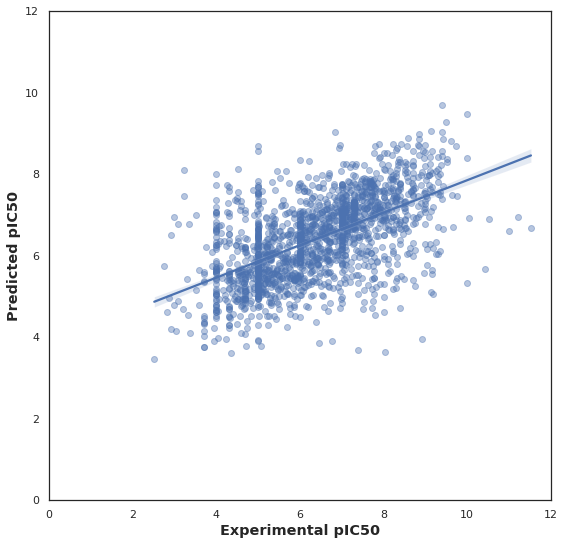

In [112]:
#experimental vs predicted pIC50
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4} )
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(9, 9)
plt.show

## Comparing regressors

In [51]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [113]:
#defines and builds the lazyregressor

clf=LazyRegressor(verbose=2, ignore_warnings=False, custom_metric=None)
models_train, predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test, predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

  2%|█▋                                                                      | 1/42 [00:00<00:32,  1.26it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.12844743727755514, 'RMSE': 1.3861371534594507, 'Time taken': 0.7951419353485107}


  7%|█████▏                                                                  | 3/42 [00:01<00:21,  1.82it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.8247108732819575, 'RMSE': 0.6216370644588648, 'Time taken': 0.9843008518218994}
{'Model': 'BayesianRidge', 'R-Squared': 0.25131570193693487, 'RMSE': 1.2847208565966193, 'Time taken': 0.12460756301879883}


 14%|██████████▎                                                             | 6/42 [00:02<00:08,  4.47it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9339775855688529, 'RMSE': 0.3815092861639381, 'Time taken': 0.20899438858032227}
{'Model': 'DummyRegressor', 'R-Squared': 0.0, 'RMSE': 1.4847707803071917, 'Time taken': 0.050962209701538086}
{'Model': 'ElasticNet', 'R-Squared': 0.0, 'RMSE': 1.4847707803071917, 'Time taken': 0.05589008331298828}


 17%|████████████                                                            | 7/42 [00:06<00:42,  1.21s/it]

{'Model': 'ElasticNetCV', 'R-Squared': 0.25933665410347306, 'RMSE': 1.2778204628331917, 'Time taken': 3.8031604290008545}


 19%|█████████████▋                                                          | 8/42 [00:06<00:31,  1.08it/s]

{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9339775855688529, 'RMSE': 0.3815092861639381, 'Time taken': 0.2028648853302002}


 21%|███████████████▍                                                        | 9/42 [00:19<02:25,  4.41s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9339775855688529, 'RMSE': 0.3815092861639381, 'Time taken': 13.075888872146606}
{'Model': 'GammaRegressor', 'R-Squared': 0.18570333273346207, 'RMSE': 1.3398332179590624, 'Time taken': 0.06991887092590332}


 26%|██████████████████▌                                                    | 11/42 [00:48<04:41,  9.08s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.9339775855685315, 'RMSE': 0.38150928616486673, 'Time taken': 29.45815110206604}


 29%|████████████████████▎                                                  | 12/42 [00:51<03:45,  7.51s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.3080652710786045, 'RMSE': 1.2350711485153594, 'Time taken': 2.650996446609497}


 31%|█████████████████████▉                                                 | 13/42 [00:52<02:51,  5.92s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.521504203841695, 'RMSE': 1.0270662907844512, 'Time taken': 1.3438034057617188}


 33%|███████████████████████▋                                               | 14/42 [00:53<02:06,  4.51s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.2516634706640112, 'RMSE': 1.2844224413407652, 'Time taken': 0.6814994812011719}


 36%|█████████████████████████▎                                             | 15/42 [00:55<01:39,  3.68s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.5243396030848453, 'RMSE': 1.0240187510543586, 'Time taken': 1.5124056339263916}


 40%|████████████████████████████▋                                          | 17/42 [00:58<01:04,  2.57s/it]

{'Model': 'KernelRidge', 'R-Squared': -18.533012017964346, 'RMSE': 6.562117777143271, 'Time taken': 3.3088457584381104}
{'Model': 'Lars', 'R-Squared': -1020.8729483636907, 'RMSE': 47.46329269065083, 'Time taken': 0.11677408218383789}


 43%|██████████████████████████████▍                                        | 18/42 [00:58<00:47,  1.98s/it]

{'Model': 'LarsCV', 'R-Squared': 0.04150101290489583, 'RMSE': 1.4536345654438396, 'Time taken': 0.5310254096984863}
{'Model': 'Lasso', 'R-Squared': 0.0, 'RMSE': 1.4847707803071917, 'Time taken': 0.06584858894348145}


 48%|█████████████████████████████████▊                                     | 20/42 [01:02<00:43,  1.96s/it]

{'Model': 'LassoCV', 'R-Squared': 0.2585267628573823, 'RMSE': 1.2785188994853258, 'Time taken': 3.792931318283081}
{'Model': 'LassoLars', 'R-Squared': 0.0, 'RMSE': 1.4847707803071917, 'Time taken': 0.07471442222595215}


 55%|██████████████████████████████████████▉                                | 23/42 [01:03<00:19,  1.00s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.17139269755413955, 'RMSE': 1.3515552081701827, 'Time taken': 0.27815794944763184}
{'Model': 'LassoLarsIC', 'R-Squared': 0.17139269755413955, 'RMSE': 1.3515552081701827, 'Time taken': 0.10543251037597656}
{'Model': 'LinearRegression', 'R-Squared': 0.26713672407199274, 'RMSE': 1.2710741660816303, 'Time taken': 0.07630777359008789}


 60%|██████████████████████████████████████████▎                            | 25/42 [01:05<00:18,  1.11s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.21596178887493844, 'RMSE': 1.3147041286309114, 'Time taken': 2.4995851516723633}


 62%|███████████████████████████████████████████▉                           | 26/42 [01:14<00:42,  2.64s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.8148042084562357, 'RMSE': 0.6389619089475722, 'Time taken': 8.18274474143982}


 64%|█████████████████████████████████████████████▋                         | 27/42 [01:20<00:53,  3.60s/it]

{'Model': 'NuSVR', 'R-Squared': 0.4687130146177533, 'RMSE': 1.0822410449519597, 'Time taken': 6.710816144943237}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.19494256231180762, 'RMSE': 1.332210479361231, 'Time taken': 0.07649946212768555}


 71%|██████████████████████████████████████████████████▋                    | 30/42 [01:21<00:20,  1.74s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.19494256231180762, 'RMSE': 1.332210479361231, 'Time taken': 0.20057153701782227}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.47937209565042904, 'RMSE': 1.805918402570828, 'Time taken': 0.13141083717346191}


 74%|████████████████████████████████████████████████████▍                  | 31/42 [01:21<00:14,  1.35s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.2304406282116238, 'RMSE': 1.3025082354988935, 'Time taken': 0.10865926742553711}


 76%|██████████████████████████████████████████████████████                 | 32/42 [01:22<00:11,  1.20s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -3.0305449713950284e+24, 'RMSE': 2584757348733.1367, 'Time taken': 0.7537622451782227}


 83%|███████████████████████████████████████████████████████████▏           | 35/42 [01:31<00:13,  1.89s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.8562223653746529, 'RMSE': 0.5629957020930358, 'Time taken': 8.934888362884521}
{'Model': 'Ridge', 'R-Squared': 0.267768963757803, 'RMSE': 1.2705257712079112, 'Time taken': 0.06379151344299316}
{'Model': 'RidgeCV', 'R-Squared': 0.2661911005771882, 'RMSE': 1.2718939439030328, 'Time taken': 0.1312098503112793}


 86%|████████████████████████████████████████████████████████████▊          | 36/42 [01:31<00:08,  1.49s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.21620983797415028, 'RMSE': 1.314496143249878, 'Time taken': 0.1994645595550537}


 95%|███████████████████████████████████████████████████████████████████▌   | 40/42 [01:41<00:03,  1.75s/it]

{'Model': 'SVR', 'R-Squared': 0.47213783893821004, 'RMSE': 1.0787471912116873, 'Time taken': 9.81687331199646}
StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.26713672407199274, 'RMSE': 1.2710741660816303, 'Time taken': 0.07846212387084961}
{'Model': 'TweedieRegressor', 'R-Squared': 0.1849725379963708, 'RMSE': 1.3404343032378636, 'Time taken': 0.0771949291229248}


 98%|█████████████████████████████████████████████████████████████████████▎ | 41/42 [01:42<00:01,  1.63s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.7473701485804098, 'RMSE': 0.7462799015059013, 'Time taken': 1.126054048538208}


100%|███████████████████████████████████████████████████████████████████████| 42/42 [01:43<00:00,  2.45s/it]


{'Model': 'LGBMRegressor', 'R-Squared': 0.4987698718647051, 'RMSE': 1.0511821949401112, 'Time taken': 0.574974775314331}


  2%|█▋                                                                      | 1/42 [00:00<00:31,  1.31it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.10400539360650352, 'RMSE': 1.3799968859920102, 'Time taken': 0.765413761138916}


  7%|█████▏                                                                  | 3/42 [00:01<00:20,  1.90it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.26943262473032115, 'RMSE': 1.246107602911219, 'Time taken': 0.9515728950500488}
{'Model': 'BayesianRidge', 'R-Squared': 0.22577402286606074, 'RMSE': 1.282800965561799, 'Time taken': 0.10752010345458984}


 10%|██████▊                                                                 | 4/42 [00:02<00:15,  2.50it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.10759546324871727, 'RMSE': 1.5343201649020741, 'Time taken': 0.20788955688476562}
{'Model': 'DummyRegressor', 'R-Squared': -0.00025483813456350646, 'RMSE': 1.458077939071719, 'Time taken': 0.038234710693359375}
{'Model': 'ElasticNet', 'R-Squared': -0.00025483813456350646, 'RMSE': 1.458077939071719, 'Time taken': 0.04787015914916992}


 19%|█████████████▋                                                          | 8/42 [00:06<00:27,  1.26it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.22696594378279766, 'RMSE': 1.2818131491656168, 'Time taken': 3.8875317573547363}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.12176720767751892, 'RMSE': 1.5441048207258972, 'Time taken': 0.17494821548461914}


 21%|███████████████▍                                                        | 9/42 [00:19<02:04,  3.77s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.08285947277990191, 'RMSE': 1.5170903950048573, 'Time taken': 12.823103189468384}
{'Model': 'GammaRegressor', 'R-Squared': 0.18280995455969096, 'RMSE': 1.3179136088398338, 'Time taken': 0.05112266540527344}


 26%|██████████████████▌                                                    | 11/42 [00:36<03:01,  5.85s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -13.197299323943238, 'RMSE': 5.493236259826312, 'Time taken': 17.49838352203369}


 29%|████████████████████▎                                                  | 12/42 [00:39<02:33,  5.11s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.26371496580915277, 'RMSE': 1.2509743219091738, 'Time taken': 2.6042304039001465}


 31%|█████████████████████▉                                                 | 13/42 [00:40<02:01,  4.20s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.3492489965009059, 'RMSE': 1.176069079655812, 'Time taken': 1.4046671390533447}


 33%|███████████████████████▋                                               | 14/42 [00:41<01:31,  3.27s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.20517910413671603, 'RMSE': 1.2997506605713616, 'Time taken': 0.6454317569732666}


 36%|█████████████████████████▎                                             | 15/42 [00:41<01:07,  2.50s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.2558624656900971, 'RMSE': 1.2576274677164663, 'Time taken': 0.4191586971282959}


 38%|███████████████████████████                                            | 16/42 [00:44<01:08,  2.62s/it]

{'Model': 'KernelRidge', 'R-Squared': -19.0847628037535, 'RMSE': 6.533693571458239, 'Time taken': 2.9173357486724854}
{'Model': 'Lars', 'R-Squared': -1042.3300698149994, 'RMSE': 47.090821947370465, 'Time taken': 0.09522294998168945}


 43%|██████████████████████████████▍                                        | 18/42 [00:45<00:37,  1.58s/it]

{'Model': 'LarsCV', 'R-Squared': 0.03926489713702952, 'RMSE': 1.4289835792148768, 'Time taken': 0.45894956588745117}
{'Model': 'Lasso', 'R-Squared': -0.00025483813456350646, 'RMSE': 1.458077939071719, 'Time taken': 0.05136299133300781}


 48%|█████████████████████████████████▊                                     | 20/42 [00:49<00:39,  1.79s/it]

{'Model': 'LassoCV', 'R-Squared': 0.2267991218107659, 'RMSE': 1.2819514503571259, 'Time taken': 4.182266473770142}
{'Model': 'LassoLars', 'R-Squared': -0.00025483813456350646, 'RMSE': 1.458077939071719, 'Time taken': 0.05469775199890137}


 57%|████████████████████████████████████████▌                              | 24/42 [00:49<00:14,  1.21it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.16236597980005352, 'RMSE': 1.3342971629176004, 'Time taken': 0.26991915702819824}
{'Model': 'LassoLarsIC', 'R-Squared': 0.16236597980005352, 'RMSE': 1.3342971629176004, 'Time taken': 0.09525561332702637}
{'Model': 'LinearRegression', 'R-Squared': -5.960250511741582e+21, 'RMSE': 112553152997.1008, 'Time taken': 0.06372761726379395}


 60%|██████████████████████████████████████████▎                            | 25/42 [00:52<00:19,  1.15s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.1641954539790882, 'RMSE': 1.3328392490287757, 'Time taken': 2.509352445602417}


 62%|███████████████████████████████████████████▉                           | 26/42 [01:01<00:44,  2.79s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.14421449168724476, 'RMSE': 1.3486767561864446, 'Time taken': 8.696841716766357}


 64%|█████████████████████████████████████████████▋                         | 27/42 [01:06<00:50,  3.35s/it]

{'Model': 'NuSVR', 'R-Squared': 0.3342721718799281, 'RMSE': 1.1895255215772007, 'Time taken': 5.163798093795776}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.17794572856467739, 'RMSE': 1.3218301508553996, 'Time taken': 0.05549502372741699}


 71%|██████████████████████████████████████████████████▋                    | 30/42 [01:06<00:19,  1.62s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.17794572856467739, 'RMSE': 1.3218301508553996, 'Time taken': 0.18337249755859375}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.5216120987645165, 'RMSE': 1.7983631094755383, 'Time taken': 0.11926078796386719}


 74%|████████████████████████████████████████████████████▍                  | 31/42 [01:06<00:13,  1.26s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.21656992457479818, 'RMSE': 1.2904034890534006, 'Time taken': 0.13001322746276855}


 76%|██████████████████████████████████████████████████████                 | 32/42 [01:07<00:11,  1.16s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -2.9178877467622317e+24, 'RMSE': 2490346047046.153, 'Time taken': 0.8852512836456299}


 83%|███████████████████████████████████████████████████████████▏           | 35/42 [01:16<00:13,  1.91s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.31411951185988696, 'RMSE': 1.2073957223224359, 'Time taken': 9.136444330215454}
{'Model': 'Ridge', 'R-Squared': 0.21823560562743938, 'RMSE': 1.289030970684119, 'Time taken': 0.05086946487426758}
{'Model': 'RidgeCV', 'R-Squared': 0.22377331956817048, 'RMSE': 1.2844573606516108, 'Time taken': 0.1459949016571045}


 86%|████████████████████████████████████████████████████████████▊          | 36/42 [01:17<00:09,  1.51s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.1560568033520523, 'RMSE': 1.3393127923386463, 'Time taken': 0.1954488754272461}


 95%|███████████████████████████████████████████████████████████████████▌   | 40/42 [01:23<00:02,  1.32s/it]

{'Model': 'SVR', 'R-Squared': 0.339129523222509, 'RMSE': 1.1851780080923762, 'Time taken': 6.2535765171051025}
StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'
{'Model': 'TransformedTargetRegressor', 'R-Squared': -5.960250511741582e+21, 'RMSE': 112553152997.1008, 'Time taken': 0.0852212905883789}
{'Model': 'TweedieRegressor', 'R-Squared': 0.18250755744418412, 'RMSE': 1.3181574299766852, 'Time taken': 0.06135249137878418}


 98%|█████████████████████████████████████████████████████████████████████▎ | 41/42 [01:24<00:01,  1.32s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.28349370357188663, 'RMSE': 1.2340575526290698, 'Time taken': 1.2922084331512451}


100%|███████████████████████████████████████████████████████████████████████| 42/42 [01:25<00:00,  2.03s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.3278074442361054, 'RMSE': 1.1952871702930736, 'Time taken': 0.3511514663696289}


In [114]:
predictions_train

,R-Squared,RMSE,Time Taken
Model,,,
DecisionTreeRegressor,0.93,0.38,0.21
ExtraTreeRegressor,0.93,0.38,0.20
ExtraTreesRegressor,0.93,0.38,13.08
GaussianProcessRegressor,0.93,0.38,29.46
RandomForestRegressor,0.86,0.56,8.93
BaggingRegressor,0.82,0.62,0.98
MLPRegressor,0.81,0.64,8.18
XGBRegressor,0.75,0.75,1.13
KNeighborsRegressor,0.52,1.02,1.51


In [115]:
predictions_test

,R-Squared,RMSE,Time Taken
Model,,,
HistGradientBoostingRegressor,0.35,1.18,1.40
SVR,0.34,1.19,6.25
NuSVR,0.33,1.19,5.16
LGBMRegressor,0.33,1.20,0.35
RandomForestRegressor,0.31,1.21,9.14
XGBRegressor,0.28,1.23,1.29
BaggingRegressor,0.27,1.25,0.95
GradientBoostingRegressor,0.26,1.25,2.60
KNeighborsRegressor,0.26,1.26,0.42


[(0.0, 1.0)]

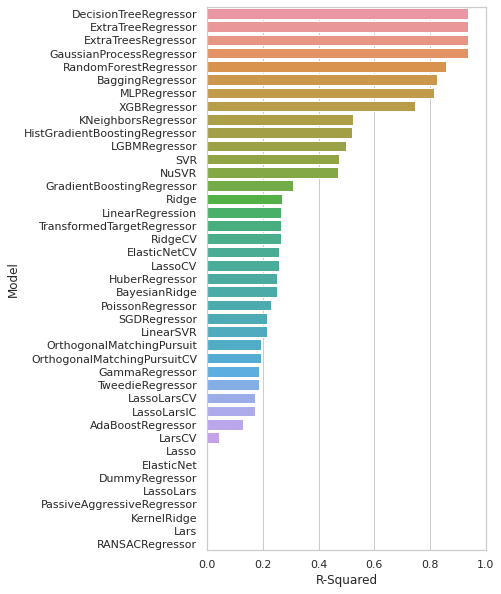

In [116]:
#data visualization of model performance

# Bar plot of R-squared values (train set)
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

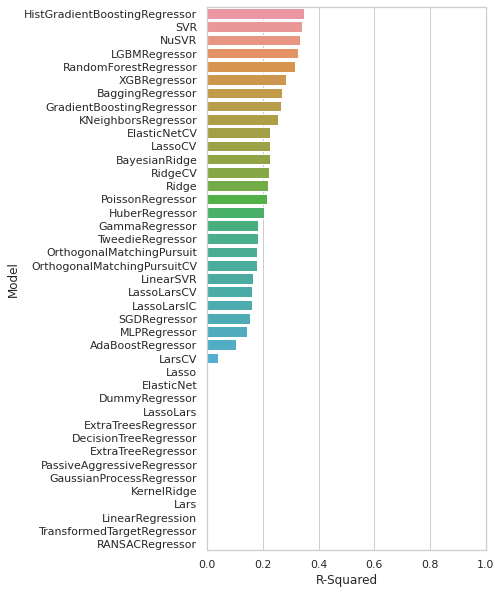

In [117]:
# Bar plot of R-squared values (test set)
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="R-Squared", data=predictions_test)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

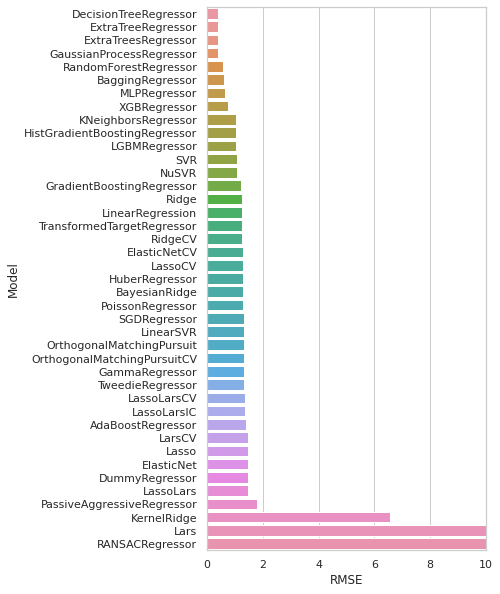

In [118]:
# Bar plot of RMSE values (train)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

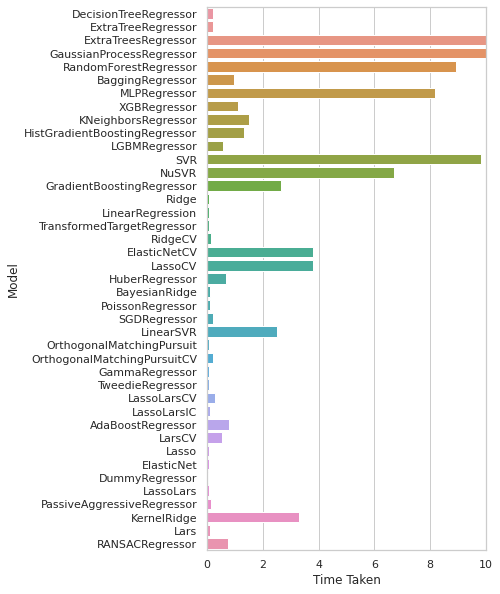

In [119]:
# Bar plot of calculation time (train)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

Random forest regression seems to be the most accurate between the test and train data predictions. Likely parameter optimization would be help such low r2 for the test set predictions.

In [120]:
#Save descriptor list to be used in app:

df_X.to_csv('descriptor_list_EGFR_model.csv', index=False)


In [123]:
import pickle

In [124]:
pickle.dump(model, open('EGFRerbb1_model.pkl', 'wb'))